In [23]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../results"))
from utils_result import get_loss,get_standardised_loss

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

In [25]:
loss = get_standardised_loss("../results/increasing_data_experiment/","pool","val_loss")

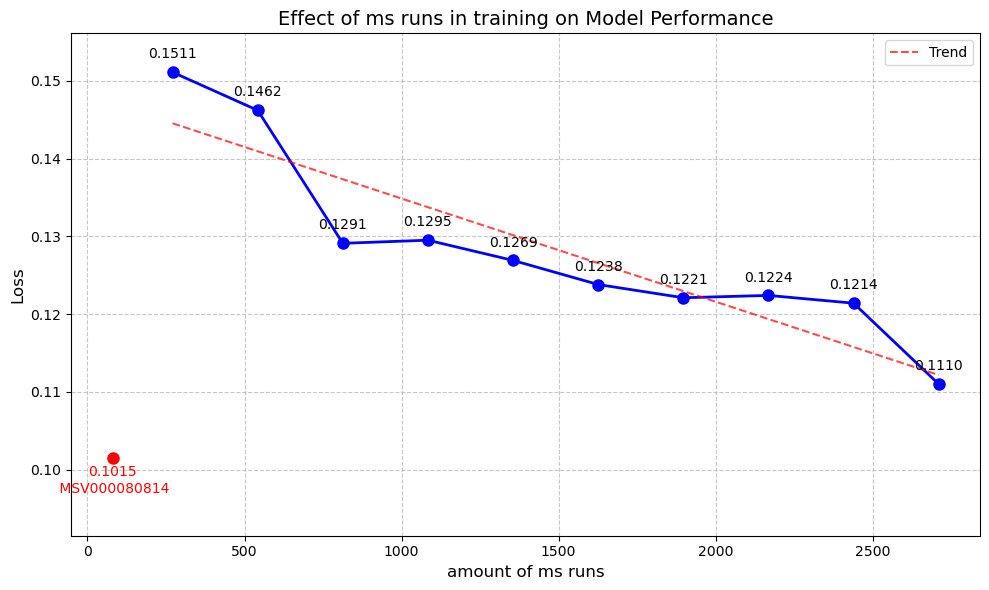

In [27]:
regular_entries = loss.index[loss.index != 'pool_MSV000080814']

# Extract pool sizes from index and create a new series with numeric indices
pool_sizes = pd.Series(
    [int(re.search(r'pool_(\d+)', x).group(1)) for x in regular_entries],
    index=regular_entries
)

# Sort by pool size
sorted_indices = pool_sizes.argsort()
sorted_sizes = pool_sizes.iloc[sorted_indices].values
sorted_values = loss.loc[regular_entries].iloc[sorted_indices].values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, sorted_values, marker='o', linestyle='-', color='blue', 
         linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('amount of ms runs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effect of ms runs in training on Model Performance', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Customize y-axis limits to better show the variations
plt.ylim(min(min(sorted_values), loss['pool_MSV000080814']) - 0.01, 
         max(sorted_values) + 0.005)

# Annotate each point with its value
for size, value in zip(sorted_sizes, sorted_values):
    plt.annotate(f'{value:.4f}', 
                 (size, value),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

# Coordinates for the special point
x_special = 80  # or whatever x-value you want
y_special = loss['pool_MSV000080814']

# Plot the special point with a different color
plt.plot(x_special, y_special, 'ro', markersize=8)  # 'ro' means red circle

# Annotate the special point
plt.annotate(f'{y_special:.4f}\n MSV000080814', 
             (x_special, y_special), 
             textcoords="offset points",
             xytext=(0, -25),
             ha='center',
             color='red',
             fontsize=10)

# Add trend line
z = np.polyfit(sorted_sizes, sorted_values, 1)
p = np.poly1d(z)
plt.plot(sorted_sizes, p(sorted_sizes), "r--", alpha=0.7, label='Trend')

plt.legend()
plt.tight_layout()

# Save the figure (optional)
# plt.savefig('pool_size_effect.png', dpi=300)

plt.show()